In [157]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps split data evenly and randomly
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
sb.set()

pd.options.display.max_rows = 999



In [158]:
life_transform = pd.read_csv("dataset/life_transform.csv")
life_transform.drop(columns=life_transform.columns[0],axis=1,inplace=True)
print("Data dimensions", life_transform.shape)
life_transform.head()

Data dimensions (2938, 21)


COUNTRY  STATUS    YEAR  LIFE_EXPECTANCY  ADULT_MORTALITY  \
0  Afghanistan       1  2015.0         0.294686         0.802268   
1  Afghanistan       1  2014.0         0.187396         0.813152   
2  Afghanistan       1  2013.0         0.187396         0.809070   
3  Afghanistan       1  2012.0         0.180763         0.814512   
4  Afghanistan       1  2011.0         0.175788         0.818594   

   INFANT_DEATHS   ALCOHOL  PERCENTAGE_EXPENDITURE  HEPATITIS_B   MEASLES  \
0       0.606280 -1.540089               -0.653537     0.317298  0.806913   
1       0.611111 -1.540089               -0.641558     0.293245  0.766886   
2       0.615942 -1.540089               -0.643161     0.309280  0.749863   
3       0.623188 -1.540089               -0.617785     0.333333  0.883365   
4       0.628019 -1.540089               -1.506529     0.340278  0.888946   

   ...  UNDER_FIVE_DEATHS     POLIO  TOTAL_EXPENDITURE  DIPHTHERIA  HIV/AIDS  \
0  ...           0.616162  0.006410           0.562634    0.171717       0.0   
1  ...           0.621212  0.127778           0.567017    0.156566       0.0   
2  ...           0.626263  0.150000           0.556038    0.166667       0.0   
3  ...           0.632997  0.177778           0.639925    0.181818       0.0   
4  ...           0.639731  0.183333           0.497836    0.186869       0.0   

        GDP  POPULATION  THINNESS_5_to_19_YEARS  \
0 -0.765913    0.695802                1.863475   
1 -0.745047   -0.642920                1.881842   
2 -0.731598    0.674292                1.896363   
3 -0.705787   -0.011252                1.914304   
4 -1.725140   -0.073218                1.932018   

   INCOME_COMPOSITION_OF_RESOURCES  SCHOOLING  
0                         0.215278       10.1  
1                         0.211111       10.0  
2                         0.202778        9.9  
3                         0.193056        9.8  
4                         0.180556        9.5  

[5 rows x 21 columns]

*Updated descriptions of dataset*
>**1) Country**: Country <br>
>**2) Year**: Year in which the data is collected, ranges from `2000` to `2015`. A total of `16` years per country <br>
>**3) Status**: Whether country is developing or developed <br>
>**4) Life expectancy**: Life expectancy in age <br>
>**5) Adult Mortality**: ~Probability of dying Number~ Percentage of deaths between `15` and `60` years ~per `1000` population~. Both male and female. `(%)` <br>
>**6) Infant deaths**: ~Number~ Percentage of Infant Deaths ~per `1000` population~ `(%)` <br>
>**7) Alcohol**: Alcohol consumption (in litres of pure alcohol), per capita (15+) <br>
>**8) Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita`(%)` <br>
>**9) Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds `(%)` <br>
>**10) Measles**: Measles - ~number~ Percentage of reported cases in population `(%)` ~per `1000` population~ <br>
>**11) BMI**: Average Body Mass Index of entire population <br>
>**12) under-five-deaths**: ~Number~ Percentage of under-five deaths in population ~per `1000` population~ `(%)`<br>
>**13) Polio**: Polio (Pol3) immunization coverage among 1-year-olds `(%)` <br>
>**14) Total expenditure**: General government expenditure on health as a percentage of total government expenditure `(%)` <br>
>**15) Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds `(%)` <br>
>**16) HIV/AIDS**: Percentage of live births who died from HIV/AIDS (0-4 years)`(%)` <br>
>**17) GDP**:Gross Domestic Product per capita (in USD) <br>
>**18) Population**: Population <br>
>**19) Thinness 5-19 years**: Prevalence of thinness among children and adolescents for Age `5` to `19` `(%)` <br>
>**20) Income composition**:Human Development Index in terms of income composition of resources (index ranging from `0` to `1`) <br>
>**21) Schooling**: Number of years of Schooling(years) <br>

In [159]:
life_transform.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNTRY                          2938 non-null   object 
 1   STATUS                           2938 non-null   int64  
 2   YEAR                             2938 non-null   float64
 3   LIFE_EXPECTANCY                  2938 non-null   float64
 4   ADULT_MORTALITY                  2938 non-null   float64
 5   INFANT_DEATHS                    2938 non-null   float64
 6   ALCOHOL                          2938 non-null   float64
 7   PERCENTAGE_EXPENDITURE           2938 non-null   float64
 8   HEPATITIS_B                      2938 non-null   float64
 9   MEASLES                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  UNDER_FIVE_DEATHS                2938 non-null   float64
 12  POLIO               

In [160]:
# lifeEx = lifeEx.drop(['Unnamed: 0'],axis=1)
# lifeEx = lifeEx.drop(['COUNTRY'],axis=1)
# lifeEx = lifeEx.drop(['STATUS'],axis=1)

life_transform.describe()


STATUS         YEAR  LIFE_EXPECTANCY  ADULT_MORTALITY  \
count  2938.000000  2938.000000      2938.000000      2938.000000   
mean      0.825732  2007.518720         0.501309         0.497070   
std       0.379405     4.613841         0.278344         0.280640   
min       0.000000  2000.000000         0.000000         0.000000   
25%       1.000000  2004.000000         0.249396         0.253333   
50%       1.000000  2008.000000         0.522222         0.495726   
75%       1.000000  2012.000000         0.742690         0.744048   
max       1.000000  2015.000000         1.000000         1.000000   

       INFANT_DEATHS       ALCOHOL  PERCENTAGE_EXPENDITURE  HEPATITIS_B  \
count    2938.000000  2.938000e+03            2.938000e+03  2938.000000   
mean        0.498657 -1.876572e-16           -7.742842e-17     0.506461   
std         0.272273  1.000170e+00            1.000170e+00     0.295571   
min         0.000000 -1.540089e+00           -2.312958e+00     0.000000   
25%         0.244444 -8.247969e-01           -7.858454e-01     0.245138   
50%         0.489899  1.080217e-01           -6.462024e-02     0.500000   
75%         0.766700  7.882520e-01            9.911980e-01     0.777778   
max         1.000000  2.393661e+00            1.623804e+00     1.000000   

           MEASLES          BMI  UNDER_FIVE_DEATHS        POLIO  \
count  2938.000000  2938.000000        2938.000000  2938.000000   
mean      0.431738    38.790629           0.484631     0.509762   
std       0.340305    20.485912           0.295749     0.302967   
min       0.000000     1.000000           0.000000     0.000000   
25%       0.000000    19.400000           0.230769     0.244444   
50%       0.487179    43.900000           0.500000     0.518519   
75%       0.730711    56.400000           0.767688     0.777778   
max       1.000000   116.135422           1.000000     1.000000   

       TOTAL_EXPENDITURE   DIPHTHERIA     HIV/AIDS           GDP  \
count       2.938000e+03  2938.000000  2938.000000  2.938000e+03   
mean        4.402348e-17     0.505652     0.308969 -4.586755e-16   
std         1.000170e+00     0.298637     0.389081  1.000170e+00   
min        -3.762931e+00     0.000000     0.000000 -3.073607e+00   
25%        -5.484182e-01     0.255556     0.000000 -7.687574e-01   
50%        -2.295318e-03     0.518519     0.000000 -2.444449e-02   
75%         5.692044e-01     0.777778     0.736111  8.016743e-01   
max         2.871616e+00     1.000000     1.000000  1.746533e+00   

         POPULATION  THINNESS_5_to_19_YEARS  INCOME_COMPOSITION_OF_RESOURCES  \
count  2.938000e+03            2.938000e+03                      2938.000000   
mean   1.053540e-16           -2.648966e-16                         0.498775   
std    1.000170e+00            1.000170e+00                         0.284977   
min   -2.426608e+00           -2.172591e+00                         0.000000   
25%   -6.717270e-01           -7.715521e-01                         0.242630   
50%   -8.349672e-02           -2.535882e-02                         0.508547   
75%    6.764212e-01            8.014589e-01                         0.748889   
max    2.210668e+00            2.500756e+00                         1.000000   

         SCHOOLING  
count  2938.000000  
mean     12.340658  
std       3.649192  
min       0.000000  
25%      10.300000  
50%      12.500000  
75%      14.600000  
max      26.135726

# Basic correlation exploration

We start by oberserving some relationships between various features and our **response variable, `LIFE_EXPECTANCY`**. We will do so through heatmaps first.

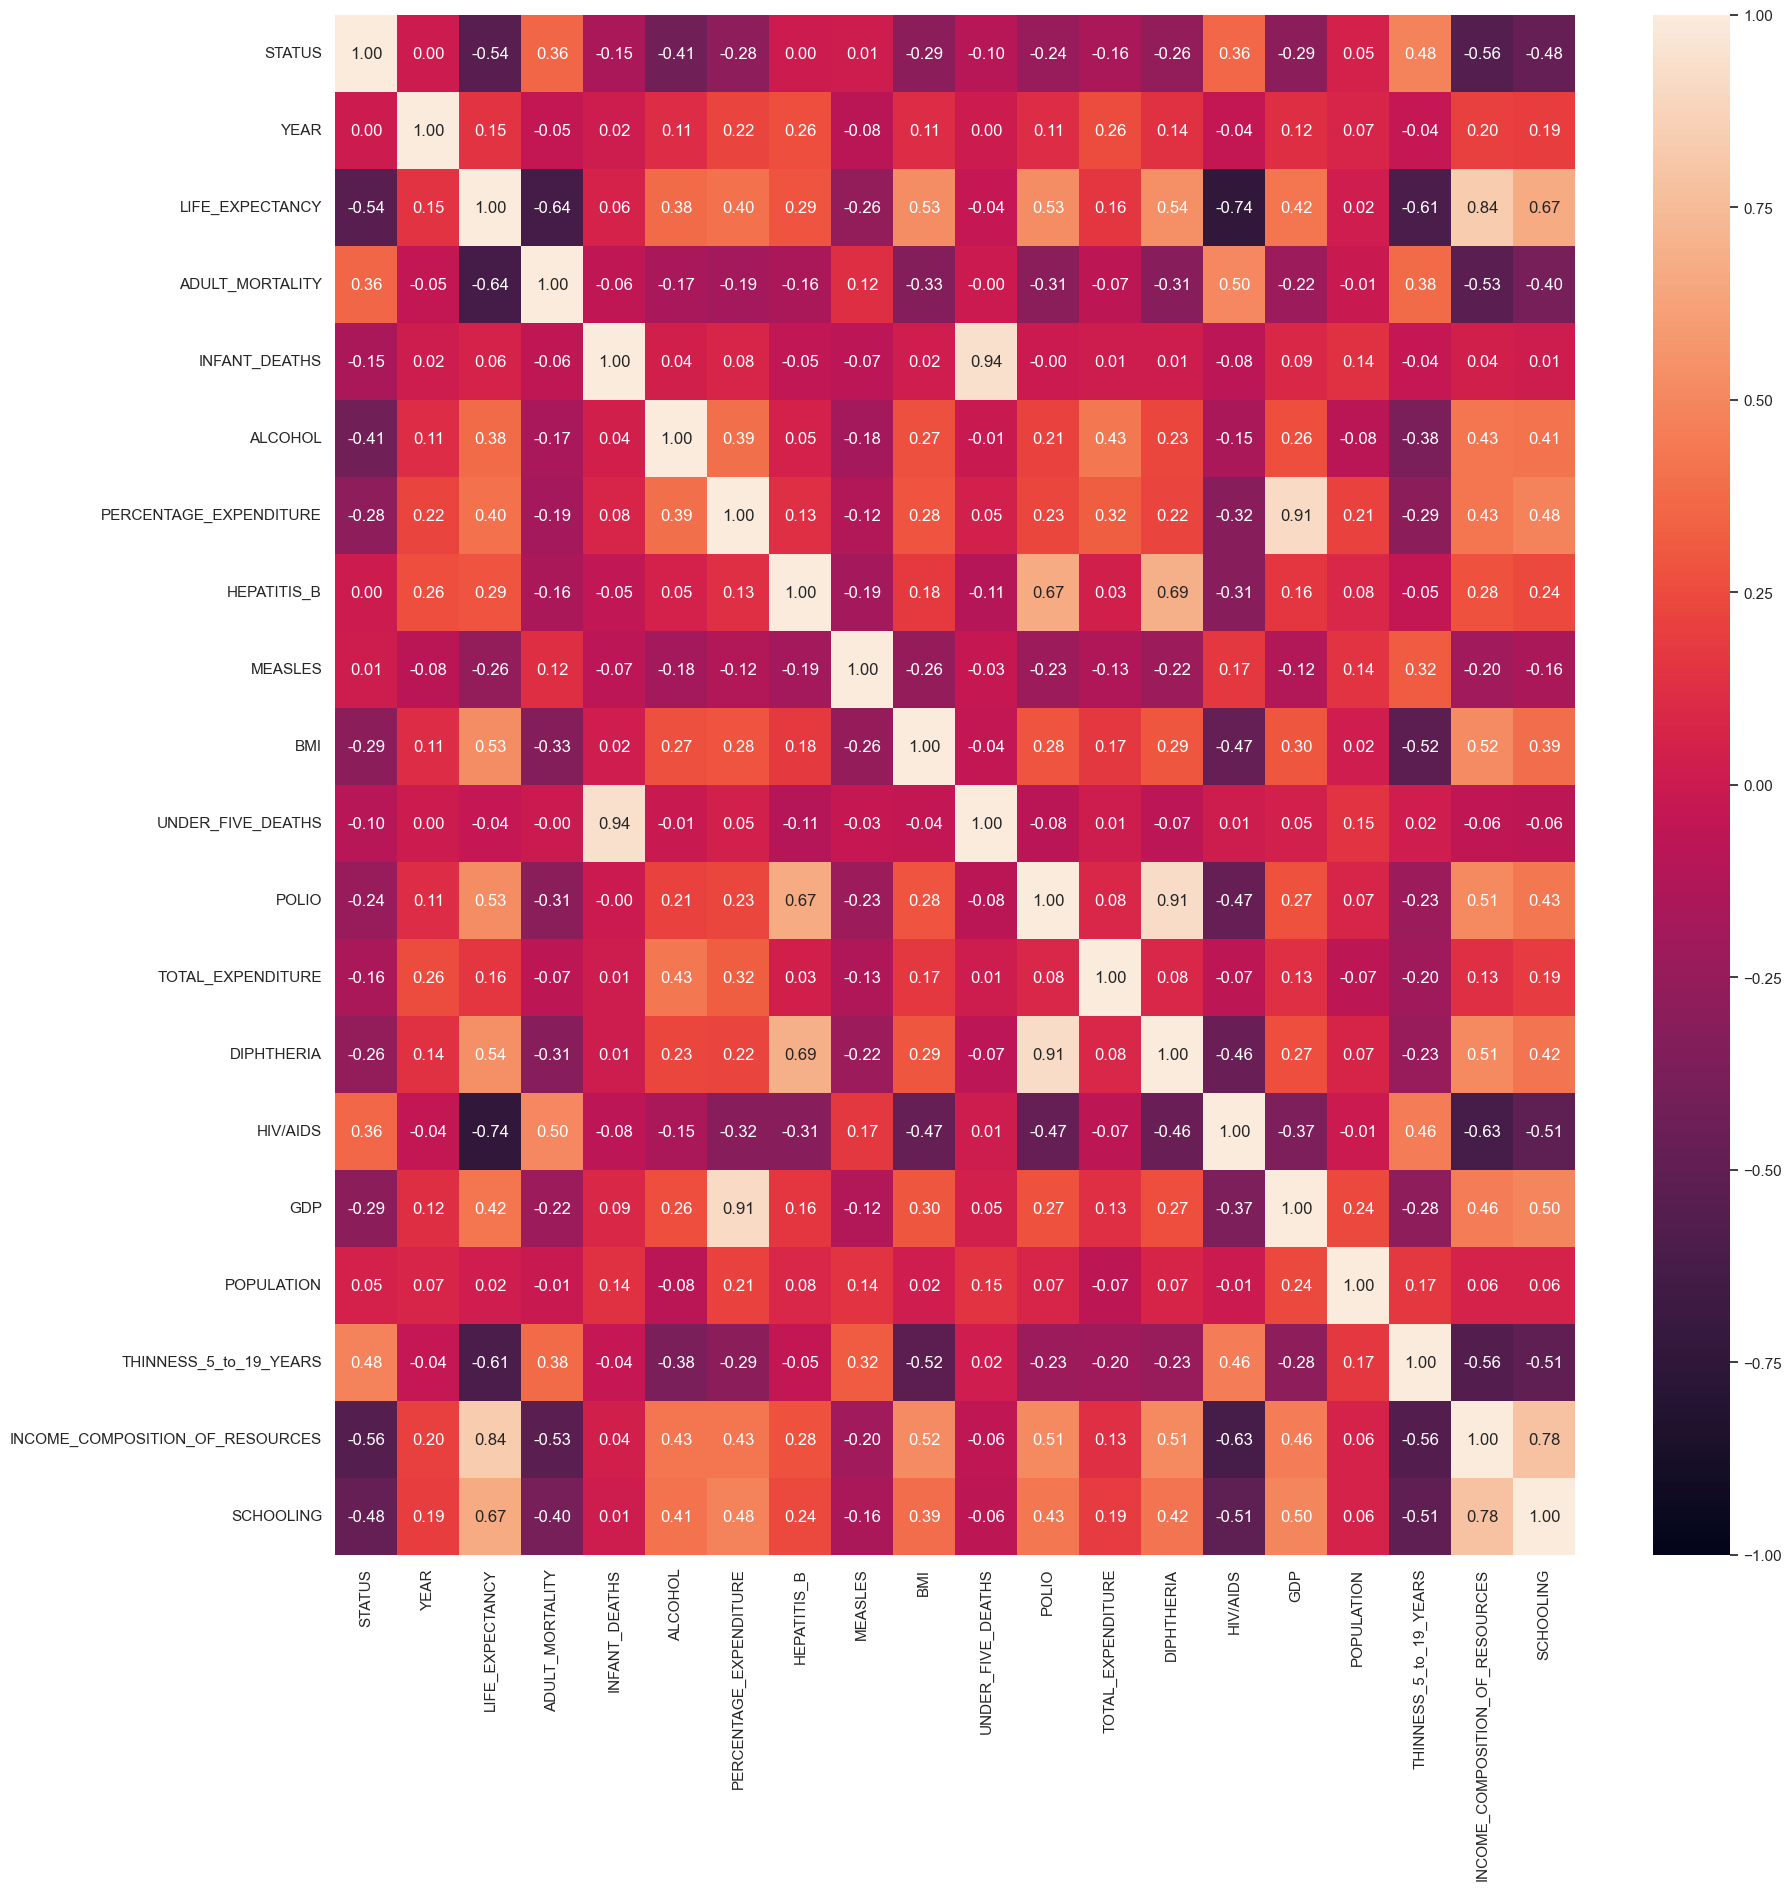

In [161]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(life_transform.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

Text(0.5, 1.0, 'Features Correlating with Life Expectancy')

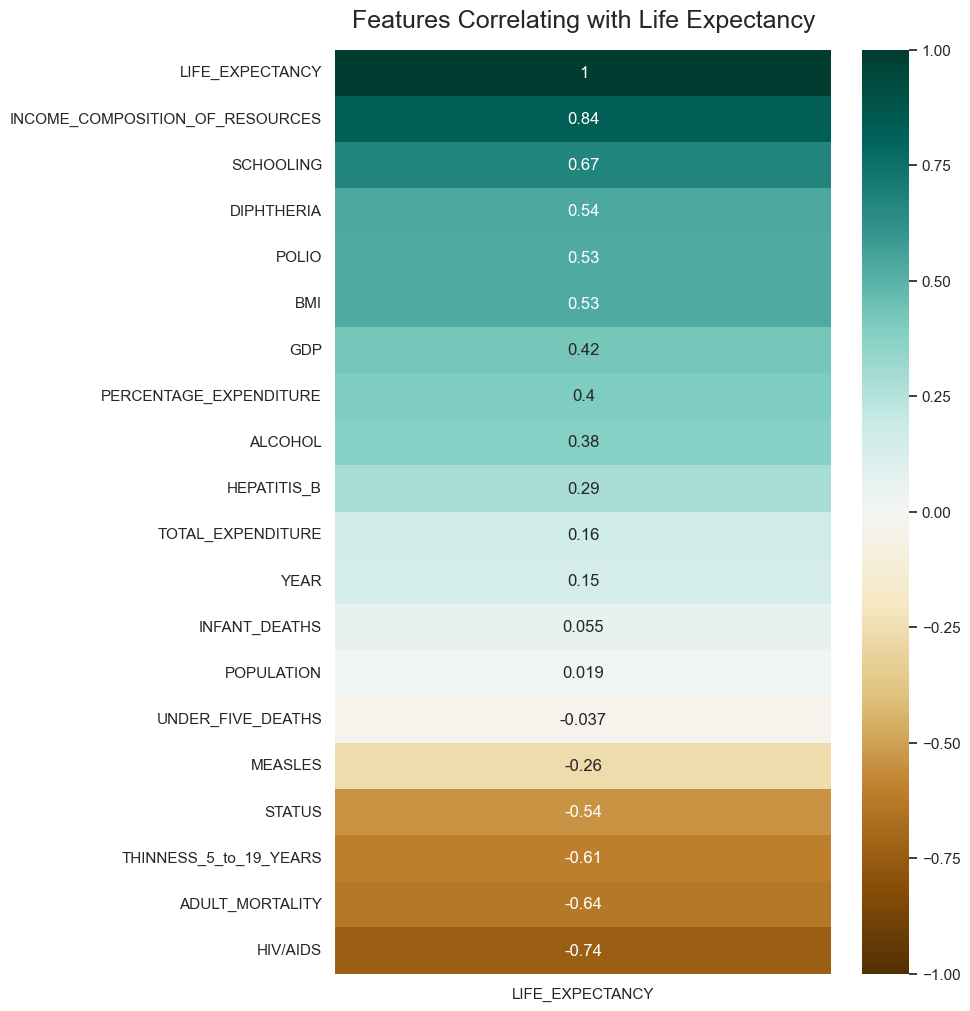

In [162]:
f=plt.figure(figsize=(8, 12))
heatmap = sb.heatmap(life_transform.corr()[['LIFE_EXPECTANCY']].sort_values(by='LIFE_EXPECTANCY', ascending=False)
, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Life Expectancy', fontdict={'fontsize':18}, pad=16)

Based on our basic observations so far, it seems like features that have a **strong positive** correlation with `LIFE_EXPECTANCY` are `SCHOOLING` and `INCOME_COMPOSITION_OF_RESOURCES` , and features that have a **strong negative** correlation with `LIFE_EXPECTANCY` are `HIV/AIDS`, `ADULT_MORTALITY` and `THINNESS_5_to_19_YEARS`, which make sense since these are often the most crippling characteristic of impoversihed nations who suffer from shorter life spans.

# Machine Learning content page

This is the start of our machine learning. Listed below is a summary of what we are going to explore.


1) Univariate Linear Regression<br>
2) Other Regression Models<br>

>- a) Data Spliting
>- b) Multivariate Linear Regression
>- c) Multivariate Linear Regression with feature selection
>- d) Polynomial Regression
>- e) Polynomial Regression (degree=2) with feature selection
>- f) Random Forest Regression
>- g) Random Forest Regression with feature selection
>- h) Our final verdict/choice

# Univariate Linear Regression

we start with simple univariate linear regression for 2 of the features with higest correlation to `LIFE_EXPECTANCY`, `HIV/AIDS` and `INCOME_COMPOSITION_OF_RESOURCES`. We will do them seperately.

#### `HIV/AIDS`

In [163]:
# Extract Response and Predictors
y = pd.DataFrame(life_transform['LIFE_EXPECTANCY'])
x = pd.DataFrame(life_transform['HIV/AIDS'])

# Split the Dataset into random Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

Train Set : (2350, 1) (2350, 1)
Test Set  : (588, 1) (588, 1)


In [164]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept 	: b =  [0.6629109]
Coefficients 	: a =  [[-0.52685237]]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5486811795363535
Mean Squared Error (MSE) 	: 0.03466836381320684

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5423748040812318
Mean Squared Error (MSE) 	: 0.0364980241683507



#### `INCOME_COMPOSITION_OF_RESOURCES`

In [165]:
# Extract Response and Predictors
y = pd.DataFrame(life_transform['LIFE_EXPECTANCY'])
x = pd.DataFrame(life_transform['INCOME_COMPOSITION_OF_RESOURCES'])

# Split the Dataset into random Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

Train Set : (2350, 1) (2350, 1)
Test Set  : (588, 1) (588, 1)


In [166]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept 	: b =  [0.09109633]
Coefficients 	: a =  [[0.81608282]]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6930350120116472
Mean Squared Error (MSE) 	: 0.023579725460073274

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7194435776410602
Mean Squared Error (MSE) 	: 0.02237585512153537



**Observations:** Univariate linear regression has relatively **poor performance** as indicated by very low `Explained Variance (R^2)`, which indicates that the model is not good at predicting `LIFE_EXPECTANCY` at all, which can be expected since in both cases only 1 feature is used, which is not enough.

# Other regression models selection

we will now move on to explore other regression models to see how they can improve our model accuracy and Explained Variance (R^2).

## Data spliting

To prevent overfitting on the train set leading to reduced accuracy on the test set, we will need to split the data into `TRAIN` and `TEST` before doing any form of feature selection. We split the data as early on as possible to prevent test data from contaminating our model during training.

In [167]:
# Extract Response and Predictors
y = pd.DataFrame(life_transform['LIFE_EXPECTANCY'])
X = pd.DataFrame(life_transform.loc[:,~life_transform.columns.isin(['COUNTRY','LIFE_EXPECTANCY'])])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2350, 19) (2350, 1)
Test Set  : (588, 19) (588, 1)


## Multivariate linear regression

We will first do a naive regression of using every feature to predict `LIFE_EXPECTANCY` and check how well this naive model does. We will

Intercept 	: b =  [-2.72267027]
Coefficients 	: a =  [[-4.90384357e-02  1.60942512e-03 -1.82123117e-01 -1.25633601e-02
   4.34622323e-03  1.48316043e-02 -4.19341003e-02 -5.36022043e-02
   1.54399022e-04 -7.33701742e-03  2.11193007e-02  3.65545422e-03
   8.89682649e-02 -1.95111022e-01 -9.98069069e-03  4.08351442e-03
  -2.76468316e-02  3.89095639e-01 -1.50968976e-03]]


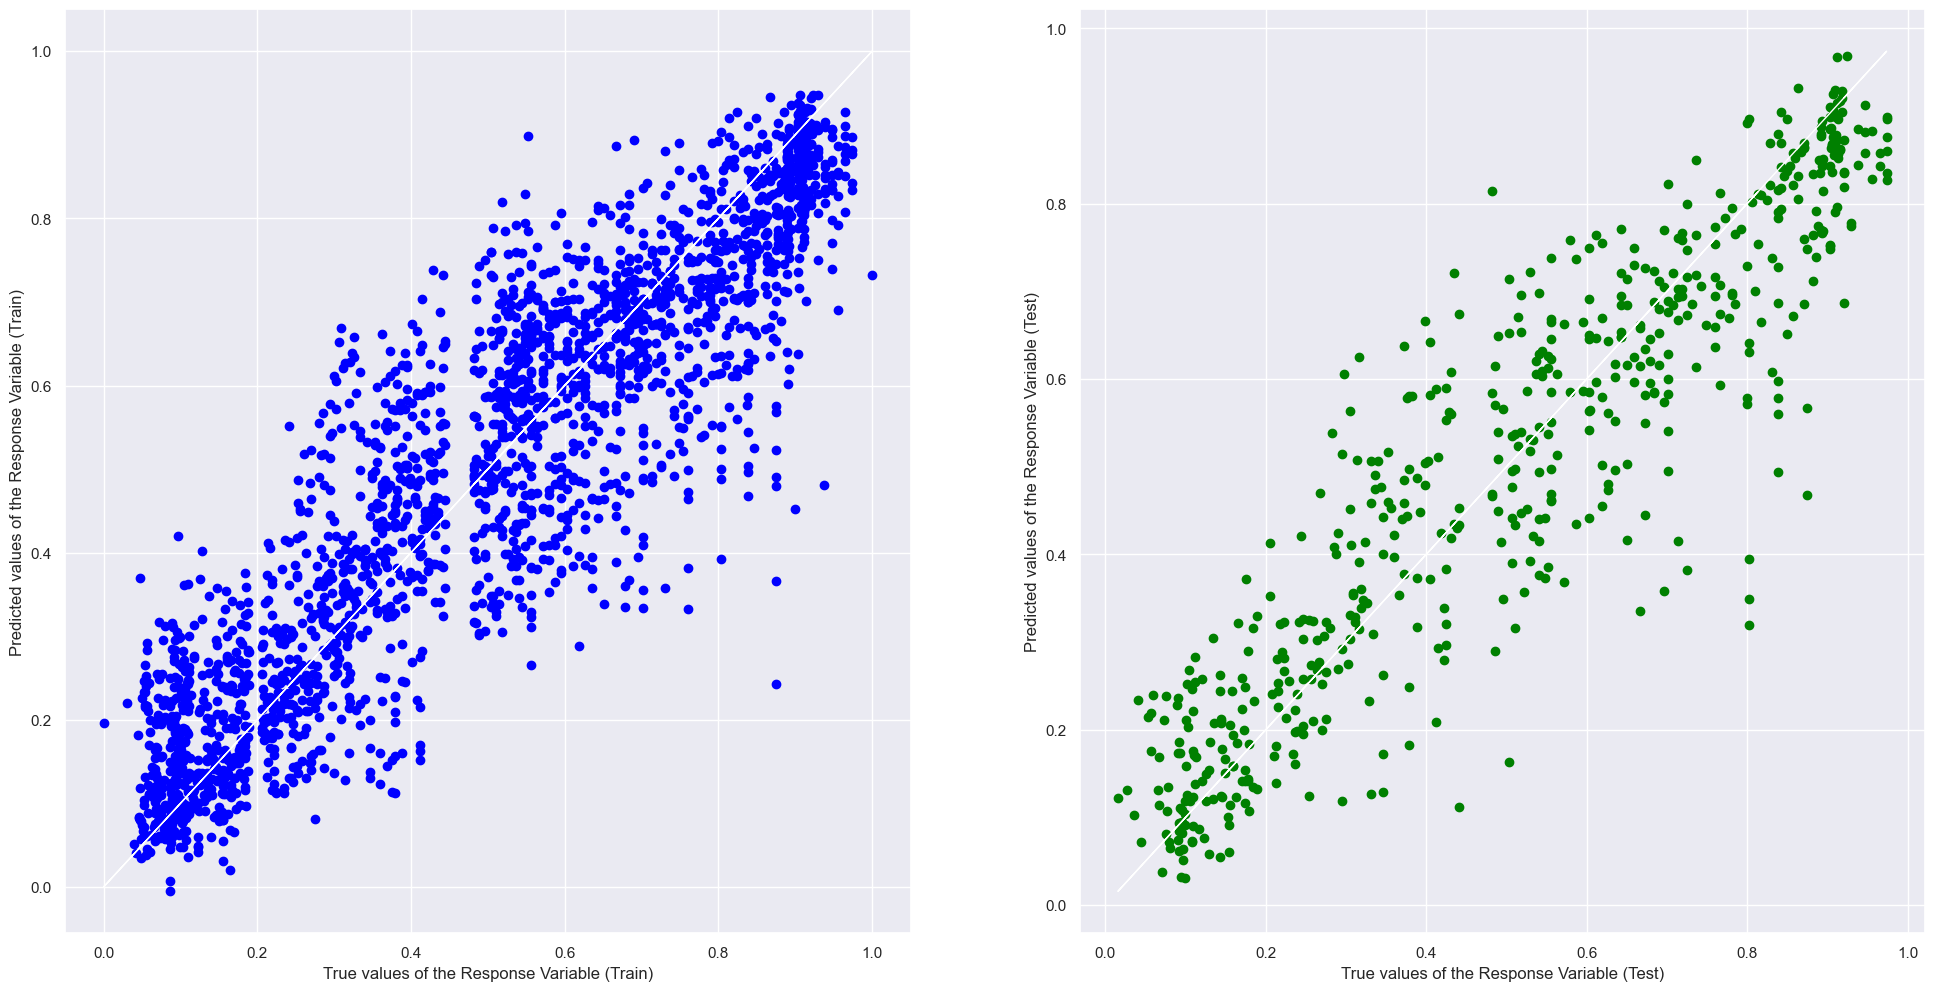

In [168]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [169]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()
print('K-fold Cross validation score:',cross_val_score(linreg, X_train, y_train, cv=5).mean())
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8252717535684102
Mean Squared Error (MSE) 	: 0.013421869731714295

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8399811999724183
Mean Squared Error (MSE) 	: 0.012762343688422837

K-fold Cross validation score: 0.8199291996833041



### evaluating machine learning model predictions

To help us better evaluate the accuracy of our models and easily visualize the predictions done by model, we will create a function that plots the predicted values of `LIFE_EXPECTANCY` given by the model vs the actual `LIFE_EXPECTANCY`. We will do this for a sample country, Singapore.

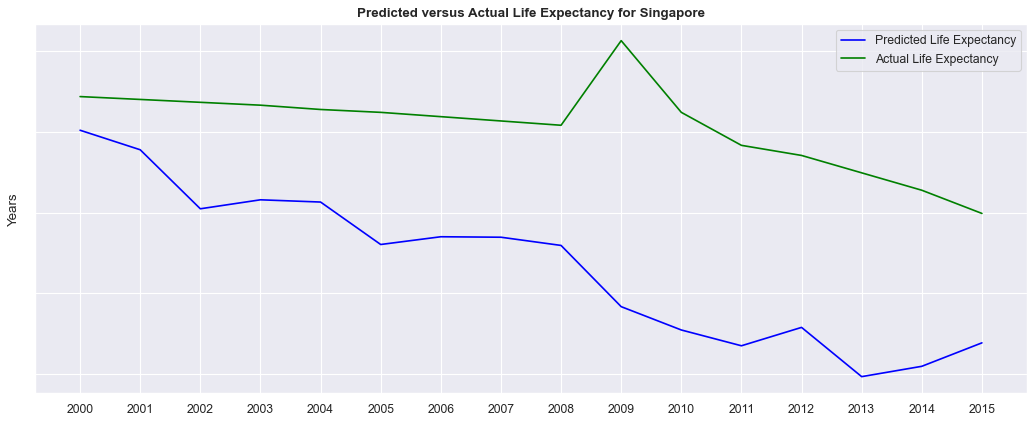

In [170]:
y_pred=life_transform[life_transform['COUNTRY']=='Singapore']['LIFE_EXPECTANCY'] #response variable
y_pred=pd.DataFrame(y_pred)
x_pred=life_transform[life_transform.columns[life_transform.columns!='LIFE_EXPECTANCY']] #predicting variables 
x_pred=x_pred[x_pred["COUNTRY"]=='Singapore']
x_pred.drop(['COUNTRY'],axis=1,inplace=True)

country_preds = linreg.predict(x_pred)

# plot predicted against actual
year = [x for x in range(2000,2016)]
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(year, country_preds, label = "Predicted Life Expectancy", color='blue')
plt.plot(year, y_pred, label = "Actual Life Expectancy", color='green')
plt.xticks(year)
plt.ylabel("Years")
plt.title("Predicted versus Actual Life Expectancy for Singapore", fontweight="bold")
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

## Multivariate linear regression with Feature Selection

We have decided to use SelectKBest from scikit learn to select the top 10 features to see if this improves model accurracy by reducing overfitting. Note that we are only learning the relationship on the **TRAIN** data and **NOT** on the **TEST** data. After receiving the top 10 features we will **do the same transformations** on **both TRAIN AND TEST**. This is to prevent informational leakage.

In [171]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


def select_features(X_train, y_train, X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=10)
    
    # learn relationship from training data ONLY
    fs.fit(X_train, y_train)
    
    #transform BOTH train and TEST
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f ' % (i, fs.scores_[i]))
   
#what are the features
X.columns[fs.get_support()]
Features=[]
for i in range(len(fs.get_support())):
    if fs.get_support()[i]== True:
        Features.append(X.columns[i])
print(Features)

Feature 0: 931.632690 
Feature 1: 62.121055 
Feature 2: 1596.325284 
Feature 3: 8.123077 
Feature 4: 387.431139 
Feature 5: 460.896530 
Feature 6: 221.037494 
Feature 7: 184.867789 
Feature 8: 977.376065 
Feature 9: 3.136827 
Feature 10: 916.584162 
Feature 11: 61.120337 
Feature 12: 939.608160 
Feature 13: 2854.530658 
Feature 14: 513.190948 
Feature 15: 1.277854 
Feature 16: 1316.357030 
Feature 17: 5301.080813 
Feature 18: 1746.096913 
['STATUS', 'ADULT_MORTALITY', 'BMI', 'POLIO', 'DIPHTHERIA', 'HIV/AIDS', 'GDP', 'THINNESS_5_to_19_YEARS', 'INCOME_COMPOSITION_OF_RESOURCES', 'SCHOOLING']


C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept 	: b =  [0.43317265]
Coefficients 	: a =  [[-4.23383732e-02 -1.80473570e-01  3.33850005e-04  2.20022450e-02
   7.14340647e-02 -1.81734820e-01  5.10308772e-03 -3.50618776e-02
   4.02179609e-01 -1.07611460e-03]]


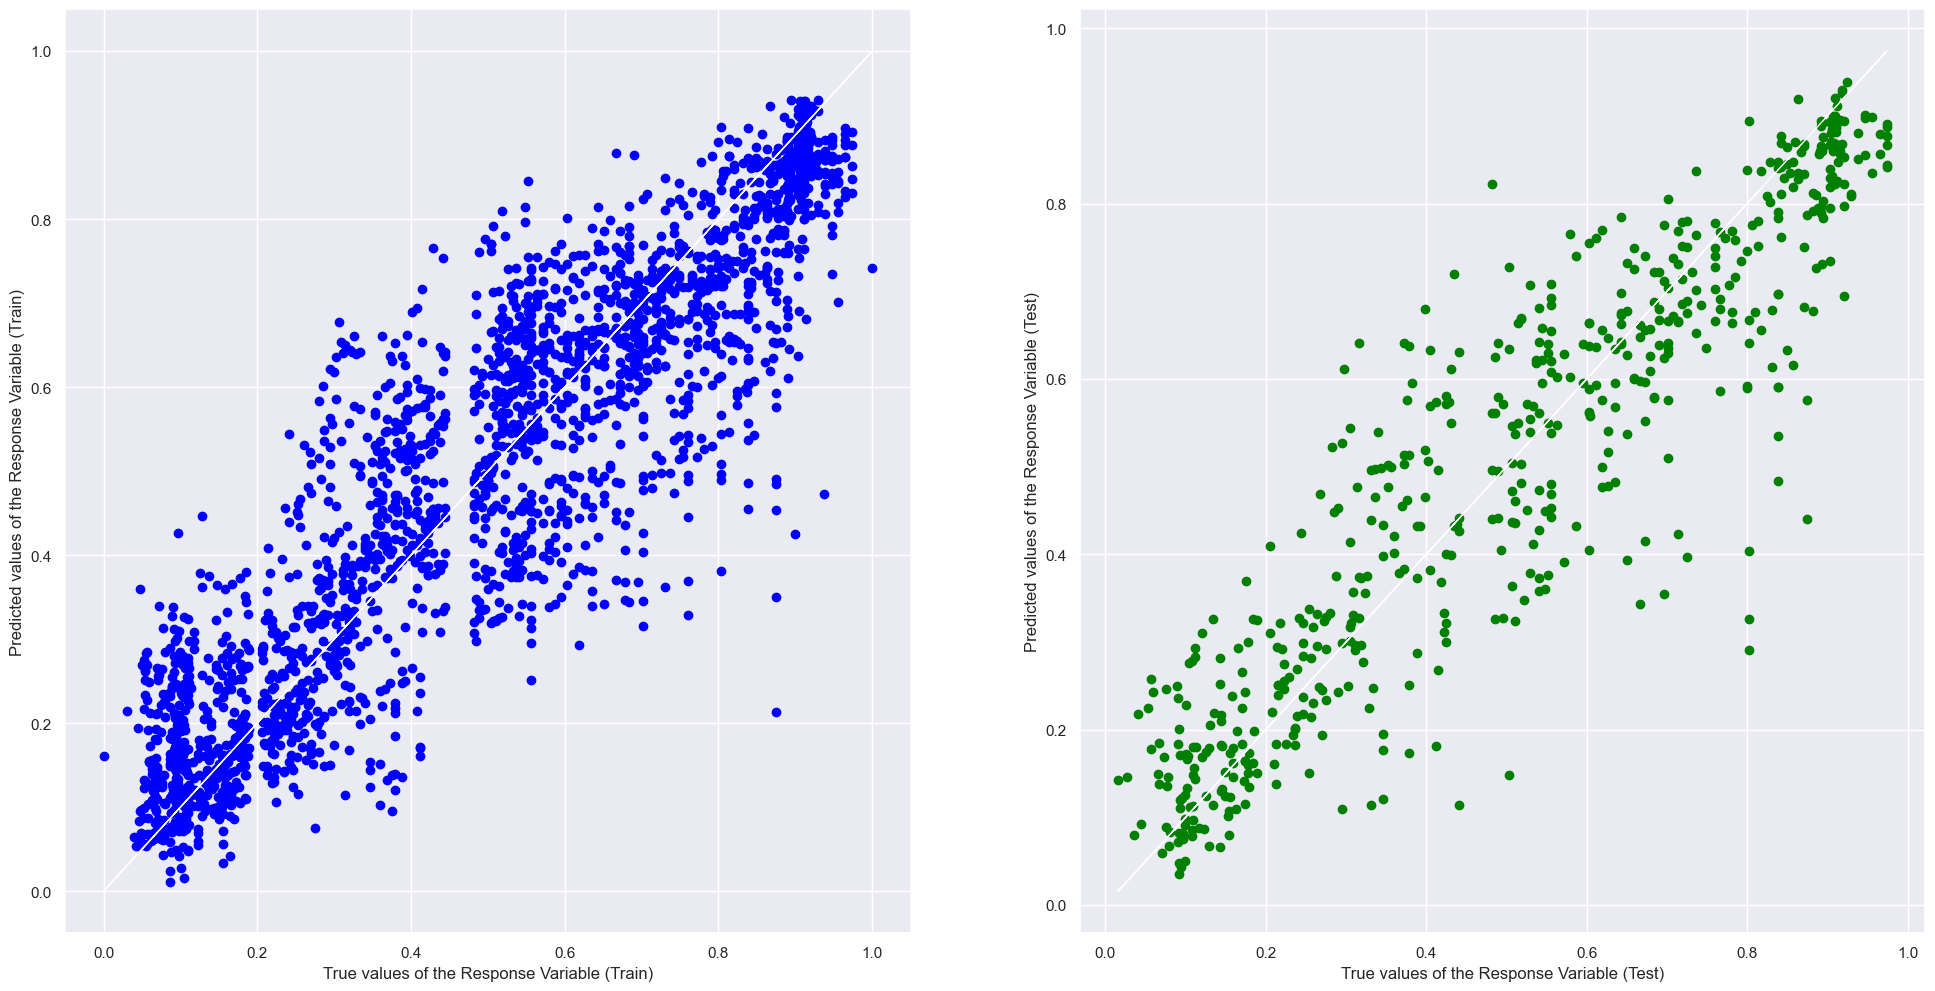

In [172]:
linreg = LinearRegression()
linreg.fit(X_train_fs, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(X_train_fs)
y_test_pred = linreg.predict(X_test_fs)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [173]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train_fs, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test_fs, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()
print('K-fold Cross validation score:',cross_val_score(linreg, X_train_fs, y_train, cv=5).mean())
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8183644203158924
Mean Squared Error (MSE) 	: 0.013952461258855447

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8375008367672466
Mean Squared Error (MSE) 	: 0.012960165742400633

K-fold Cross validation score: 0.814880289221555



### evaluating machine learning model predictions

To help us better evaluate the accuracy of our models and easily visualize the predictions done by model, we will create a function that plots the predicted values of `LIFE_EXPECTANCY` given by the model vs the actual `LIFE_EXPECTANCY`. We will do this for a sample country, Singapore.

C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


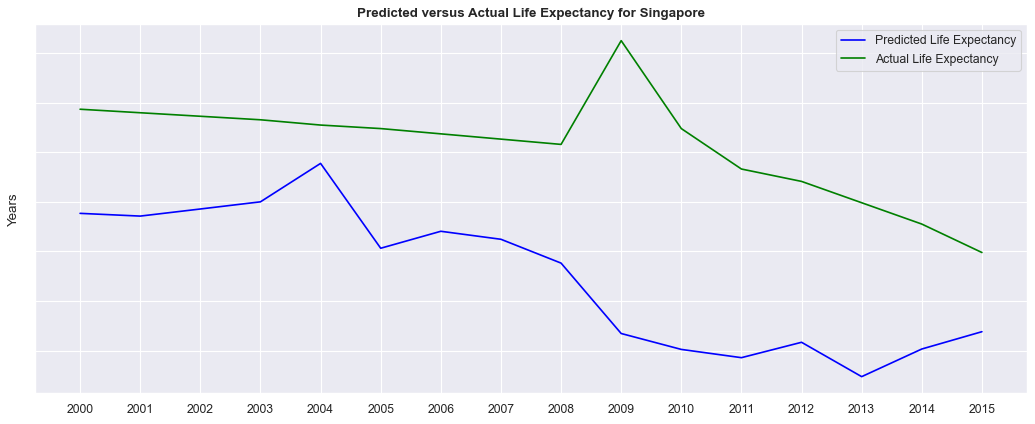

In [176]:
y_pred=life_transform[life_transform['COUNTRY']=='Singapore']['LIFE_EXPECTANCY'] #response variable
y_pred=pd.DataFrame(y_pred)
x_pred=life_transform[life_transform.columns[life_transform.columns!='LIFE_EXPECTANCY']] #predicting variables 
x_pred=x_pred[x_pred["COUNTRY"]=='Singapore']
drop=[]
for x in x_pred:
    if x not in Features:
        drop.append(x)
x_pred.drop(drop,axis=1,inplace=True)

country_preds = linreg.predict(x_pred)

# plot predicted against actual
year = [x for x in range(2000,2016)]
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(year, country_preds, label = "Predicted Life Expectancy", color='blue')
plt.plot(year, y_pred, label = "Actual Life Expectancy", color='green')
plt.xticks(year)
plt.ylabel("Years")
plt.title("Predicted versus Actual Life Expectancy for Singapore", fontweight="bold")
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

Even with only the 10 best features as select by SelectKBest, we do not see much of a drop in accuracy and performance of the model. There is really **no distinguishable difference** between Multivariate Linear Regression with only the **top 10 features** and every single feature together. This shows that the rest of the features **do not play a role** in making our model better and thus should not be used in the model. We have thus reduced overfitting by **eliminating unnecessary** features using SelectKBest.

## Polynomial Regression

We will try polynomial regression with degrees from 1 to 5 and see if that better fits our data

In [179]:
from sklearn.preprocessing import PolynomialFeatures
maxscore=0
bestDegree=0

for i in range(1,5):

    poly_reg=PolynomialFeatures(degree=i)
    X_train_poly=poly_reg.fit_transform(X_train)
    X_test_poly=poly_reg.fit_transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly,y_train)
    print("Polynomial degree is:",i)
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    print()
    
    y_train_pred = poly_reg.predict(X_train_poly)
    y_test_pred = poly_reg.predict(X_test_poly)

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", poly_reg.score(X_train_poly, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()


    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", poly_reg.score(X_test_poly, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    
    KfoldScore=cross_val_score(poly_reg, X_train_poly, y_train, cv=5).mean()
    print('K-fold Cross validation score:',KfoldScore)
    print()
    if KfoldScore > maxscore:
        maxscore=KfoldScore
        bestDegree=i

print("The most optimum degree is",bestDegree,"with a score of",maxscore)



Polynomial degree is: 1
Intercept 	: b =  [0.43317265]
Coefficients 	: a =  [[-4.23383732e-02 -1.80473570e-01  3.33850005e-04  2.20022450e-02
   7.14340647e-02 -1.81734820e-01  5.10308772e-03 -3.50618776e-02
   4.02179609e-01 -1.07611460e-03]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8252717535684103
Mean Squared Error (MSE) 	: 0.013421869731714288

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8399811999724183
Mean Squared Error (MSE) 	: 0.012762343688422838

K-fold Cross validation score: 0.819929199683304

Polynomial degree is: 2
Intercept 	: b =  [0.43317265]
Coefficients 	: a =  [[-4.23383732e-02 -1.80473570e-01  3.33850005e-04  2.20022450e-02
   7.14340647e-02 -1.81734820e-01  5.10308772e-03 -3.50618776e-02
   4.02179609e-01 -1.07611460e-03]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9264722082595483
Mean Squared Error (MSE) 	: 0.0056480876020657995

Goodness of Fit of Model 	Test Dataset
Explained 

We can also see that as degree goes beyond 2, Explained Variance (R^2) for train set becomes very high, but for test set it drops drastically, this is a **clear sign of overfitting.** Furthermore, after degree 5 the accuracy scores **go down drastically** so there **no need to explore beyond 5.**

Thus we will go with **degree 2 polynomial regression.**

Intercept 	: b =  [0.43317265]
Coefficients 	: a =  [[-4.23383732e-02 -1.80473570e-01  3.33850005e-04  2.20022450e-02
   7.14340647e-02 -1.81734820e-01  5.10308772e-03 -3.50618776e-02
   4.02179609e-01 -1.07611460e-03]]


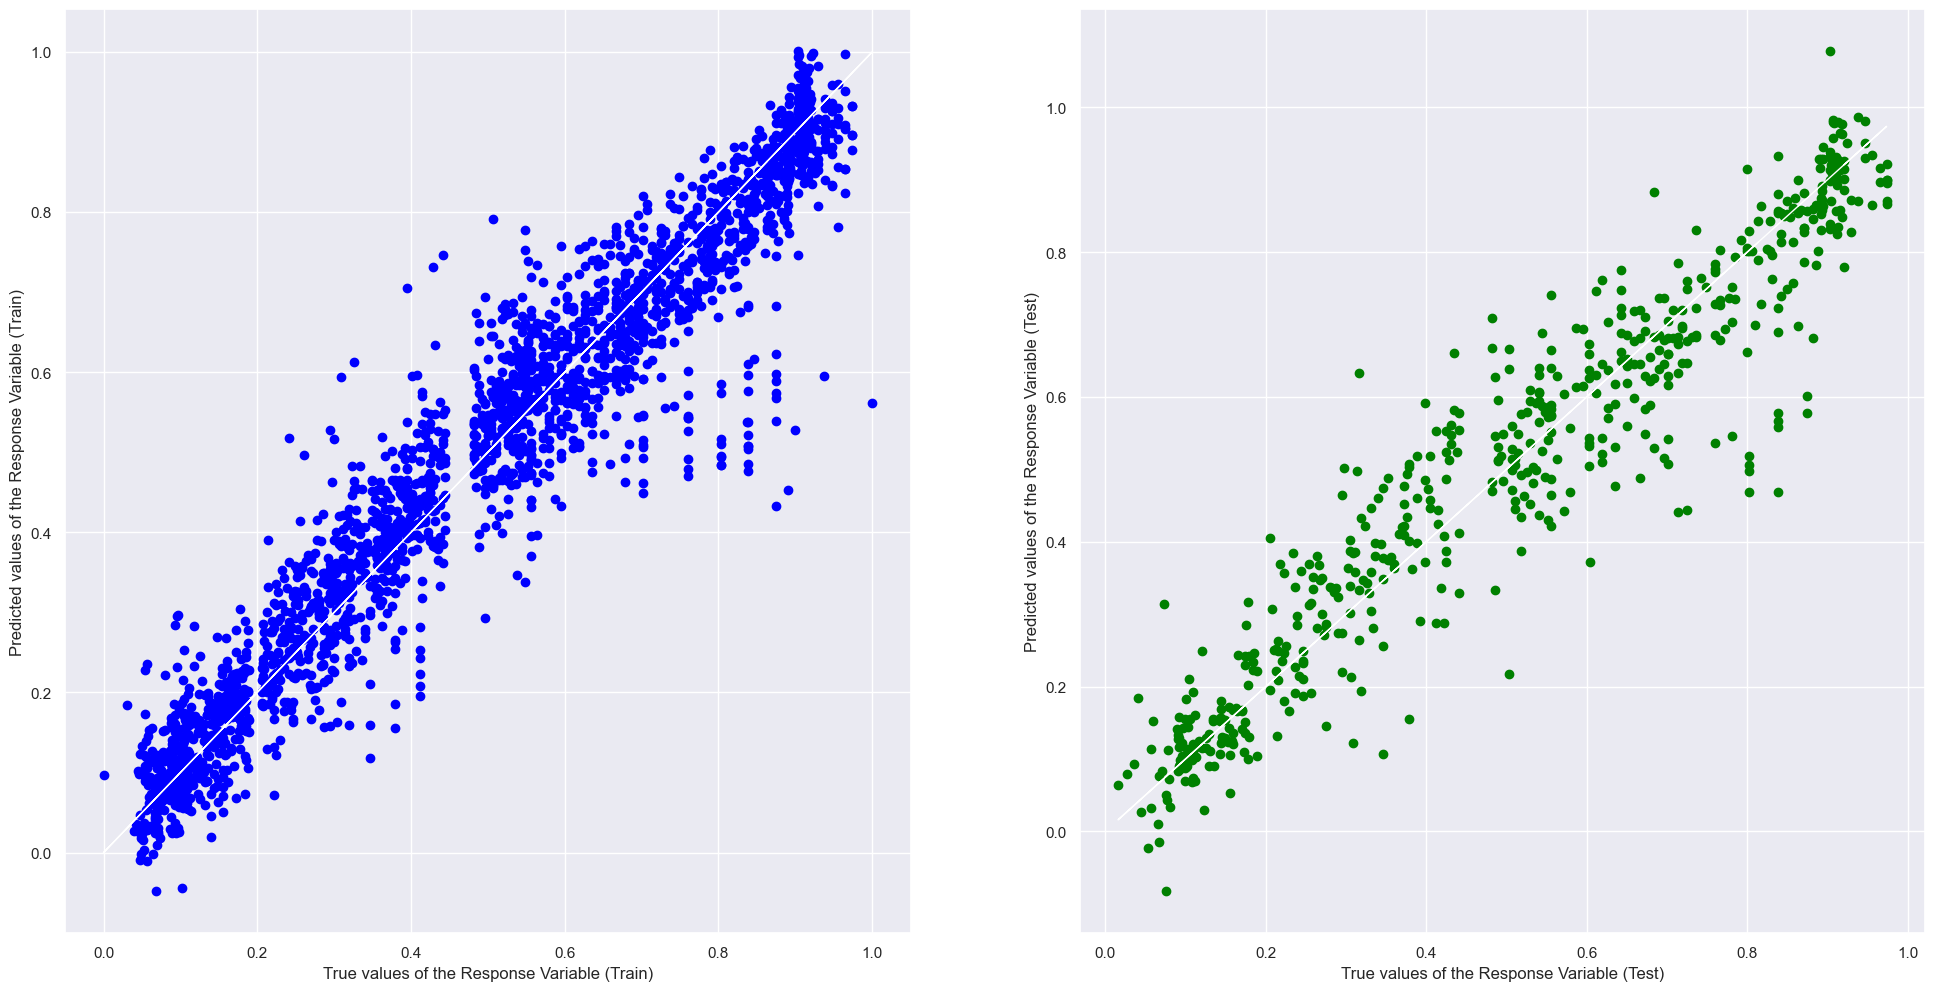

In [180]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_train_poly=poly_reg.fit_transform(X_train)
X_test_poly=poly_reg.fit_transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly,y_train)

y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [181]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", poly_reg.score(X_train_poly, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", poly_reg.score(X_test_poly, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

KfoldScore=cross_val_score(poly_reg, X_train_poly, y_train, cv=5).mean()
print('K-fold Cross validation score:',KfoldScore)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9264722082595483
Mean Squared Error (MSE) 	: 0.0056480876020657995

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9061664242596725
Mean Squared Error (MSE) 	: 0.007483722805728457

K-fold Cross validation score: 0.8994351355561119


### evaluating machine learning model predictions

To help us better evaluate the accuracy of our models and easily visualize the predictions done by model, we will create a function that plots the predicted values of `LIFE_EXPECTANCY` given by the model vs the actual `LIFE_EXPECTANCY`. We will do this for a sample country, Singapore.

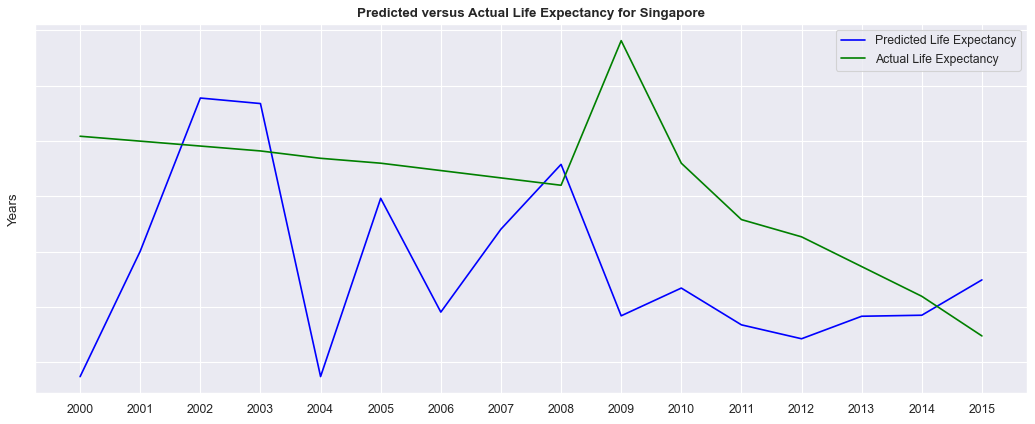

In [184]:
y_pred=life_transform[life_transform['COUNTRY']=='Singapore']['LIFE_EXPECTANCY'] #response variable
y_pred=pd.DataFrame(y_pred)
x_pred=life_transform[life_transform.columns[life_transform.columns!='LIFE_EXPECTANCY']] #predicting variables 
x_pred=x_pred[x_pred["COUNTRY"]=='Singapore']
x_pred.drop(['COUNTRY'],axis=1,inplace=True)
poly=PolynomialFeatures(degree=2)
x_pred=poly.fit_transform(x_pred)

country_preds = poly_reg.predict(x_pred)

# plot predicted against actual
year = [x for x in range(2000,2016)]
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(year, country_preds, label = "Predicted Life Expectancy", color='blue')
plt.plot(year, y_pred, label = "Actual Life Expectancy", color='green')
plt.xticks(year)
plt.ylabel("Years")
plt.title("Predicted versus Actual Life Expectancy for Singapore", fontweight="bold")
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

## Polynomial Regression (degree=2) with feature selection

We have decided to use SelectKBest from scikit learn to select the top 10 features to see if this improves model accurracy by reducing overfitting. Note that we are only learning the relationship on the **TRAIN** data and **NOT** on the **TEST** data. After receiving the top 10 features we will **do the same transformations** on **both TRAIN AND TEST**. This is to prevent informational leakage.

In [185]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


def select_features(X_train, y_train, X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=10)
    
    # learn relationship from training data ONLY
    fs.fit(X_train, y_train)
    
    #transform BOTH train and TEST
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f ' % (i, fs.scores_[i]))
   
#what are the features
X.columns[fs.get_support()]
Features=[]
for i in range(len(fs.get_support())):
    if fs.get_support()[i]== True:
        Features.append(X.columns[i])
print(Features)

Feature 0: 931.632690 
Feature 1: 62.121055 
Feature 2: 1596.325284 
Feature 3: 8.123077 
Feature 4: 387.431139 
Feature 5: 460.896530 
Feature 6: 221.037494 
Feature 7: 184.867789 
Feature 8: 977.376065 
Feature 9: 3.136827 
Feature 10: 916.584162 
Feature 11: 61.120337 
Feature 12: 939.608160 
Feature 13: 2854.530658 
Feature 14: 513.190948 
Feature 15: 1.277854 
Feature 16: 1316.357030 
Feature 17: 5301.080813 
Feature 18: 1746.096913 
['STATUS', 'ADULT_MORTALITY', 'BMI', 'POLIO', 'DIPHTHERIA', 'HIV/AIDS', 'GDP', 'THINNESS_5_to_19_YEARS', 'INCOME_COMPOSITION_OF_RESOURCES', 'SCHOOLING']


C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept 	: b =  [0.43317265]
Coefficients 	: a =  [[-4.23383732e-02 -1.80473570e-01  3.33850005e-04  2.20022450e-02
   7.14340647e-02 -1.81734820e-01  5.10308772e-03 -3.50618776e-02
   4.02179609e-01 -1.07611460e-03]]


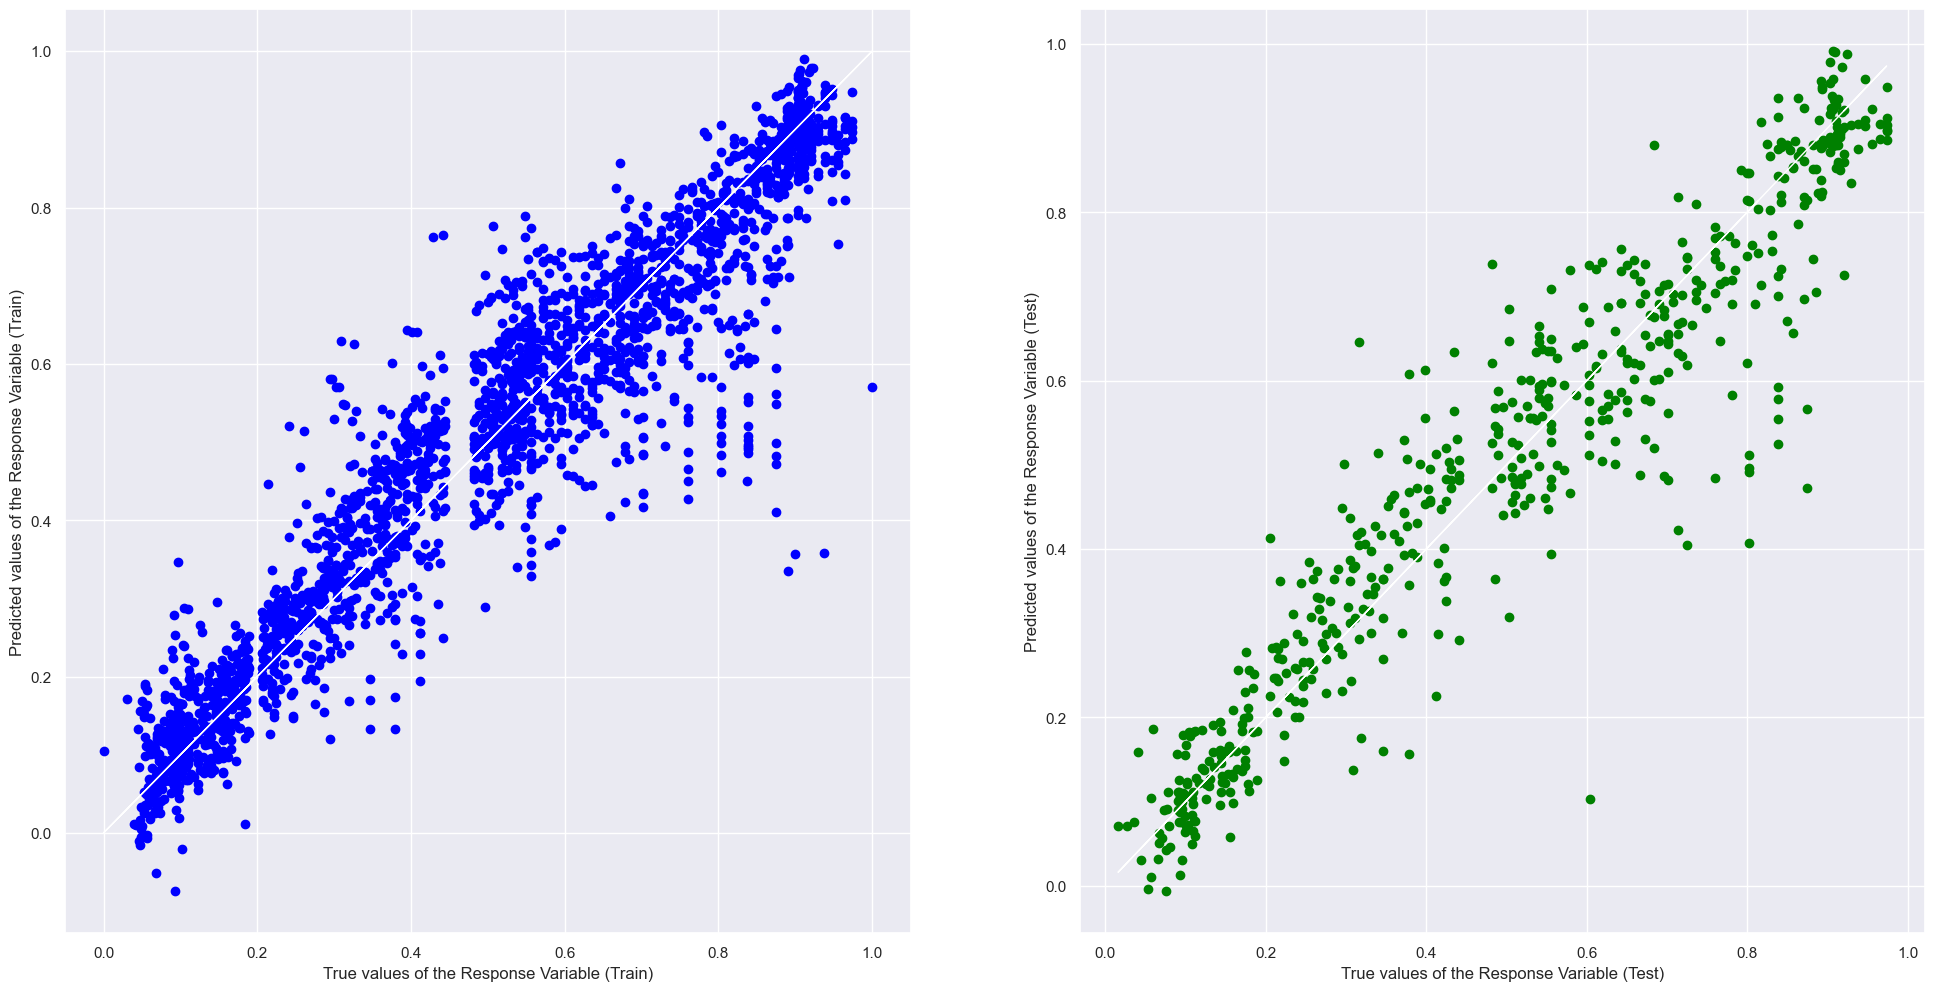

In [186]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_train_fs_poly=poly_reg.fit_transform(X_train_fs)
X_test_fs_poly=poly_reg.fit_transform(X_test_fs)

poly_reg = LinearRegression()
poly_reg.fit(X_train_fs_poly,y_train)

y_train_pred = poly_reg.predict(X_train_fs_poly)
y_test_pred = poly_reg.predict(X_test_fs_poly)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [187]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", poly_reg.score(X_train_fs_poly, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", poly_reg.score(X_test_fs_poly, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

KfoldScore=cross_val_score(poly_reg, X_train_fs_poly, y_train, cv=5).mean()
print('K-fold Cross validation score:',KfoldScore)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9026704039235517
Mean Squared Error (MSE) 	: 0.007476439478203799

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9027290662162177
Mean Squared Error (MSE) 	: 0.007757870247923827

K-fold Cross validation score: 0.8907471239121021


### evaluating machine learning model predictions

To help us better evaluate the accuracy of our models and easily visualize the predictions done by model, we will create a function that plots the predicted values of `LIFE_EXPECTANCY` given by the model vs the actual `LIFE_EXPECTANCY`. We will do this for a sample country, Singapore.

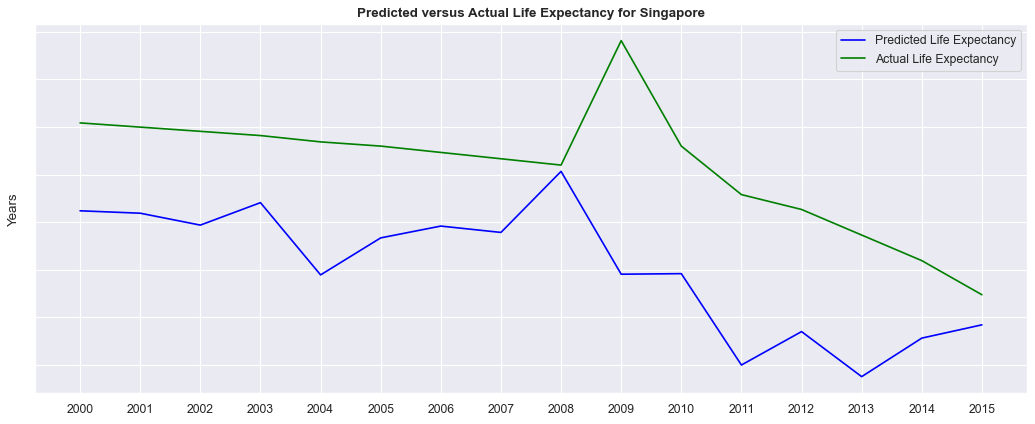

In [188]:
y_pred=life_transform[life_transform['COUNTRY']=='Singapore']['LIFE_EXPECTANCY'] #response variable
y_pred=pd.DataFrame(y_pred)
x_pred=life_transform[life_transform.columns[life_transform.columns!='LIFE_EXPECTANCY']] #predicting variables 
x_pred=x_pred[x_pred["COUNTRY"]=='Singapore']
drop=[]
for x in x_pred:
    if x not in Features:
        drop.append(x)
x_pred.drop(drop,axis=1,inplace=True)
poly=PolynomialFeatures(degree=2)
x_pred=poly.fit_transform(x_pred)

country_preds = poly_reg.predict(x_pred)

# plot predicted against actual
year = [x for x in range(2000,2016)]
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(year, country_preds, label = "Predicted Life Expectancy", color='blue')
plt.plot(year, y_pred, label = "Actual Life Expectancy", color='green')
plt.xticks(year)
plt.ylabel("Years")
plt.title("Predicted versus Actual Life Expectancy for Singapore", fontweight="bold")
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

In this case, for the 10 best features as selected by SelectKBest, although we do not see much of a drop in accuracy and performance of the model. The plot of the predictions of made with **all the features** are **a lot worse** than only using the **top 10 features**. In this case, it is a clear sign of overfitting and feature selection is essential for **eliminating unnecessary** features using SelectKBest.

## Random Forest Regression

In [201]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree

### Model Random Forest Regression

In [202]:
regressor=RandomForestRegressor(n_estimators=1000,random_state=42)
regressor.fit(X_train,y_train.values.ravel())

RandomForestRegressor(n_estimators=1000, random_state=42)

### Check Output

In [203]:
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)
y_train_pred=pd.DataFrame(y_train_pred,columns=['yPredict'])
y_test_pred=pd.DataFrame(y_test_pred,columns=['yPredict'])

### Scatter Plot

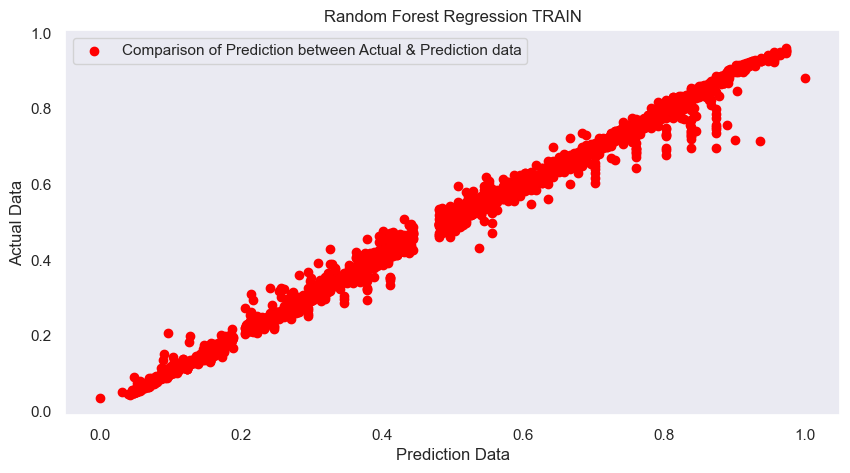

In [204]:
plt.figure(figsize=(10,5))
plt.scatter(y_train,y_train_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TRAIN')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

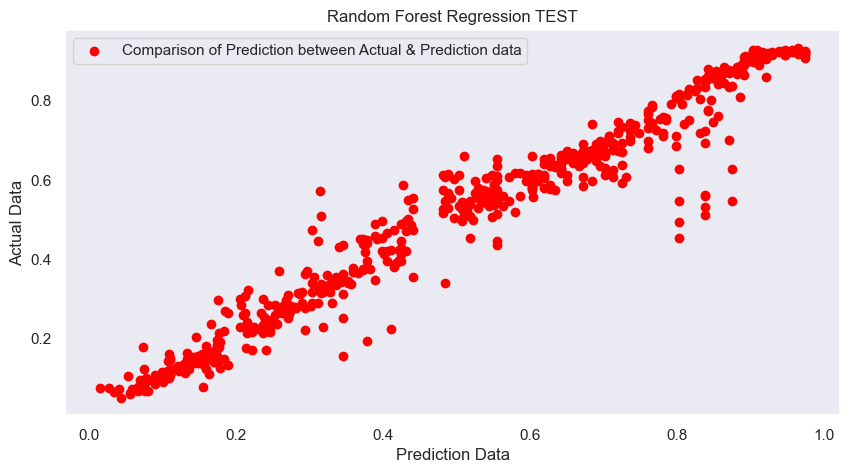

In [205]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TEST')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

In [206]:
plot_tree(regressor.estimators_[0],
              filled = True,
              feature_names=X_train.columns,
              fontsize=7)
plt.show()

KeyboardInterrupt: 

In [207]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

KfoldScore=cross_val_score(regressor, X_train, y_train.values.ravel(), cv=5).mean()
print('K-fold Cross validation score:',KfoldScore)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.993193878042767
Mean Squared Error (MSE) 	: 0.0005228169122838819

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.954850927572075
Mean Squared Error (MSE) 	: 0.0036008767684756727

K-fold Cross validation score: 0.9393676683457644


### evaluating machine learning model predictions

To help us better evaluate the accuracy of our models and easily visualize the predictions done by model, we will create a function that plots the predicted values of `LIFE_EXPECTANCY` given by the model vs the actual `LIFE_EXPECTANCY`. We will do this for a sample country, Singapore.

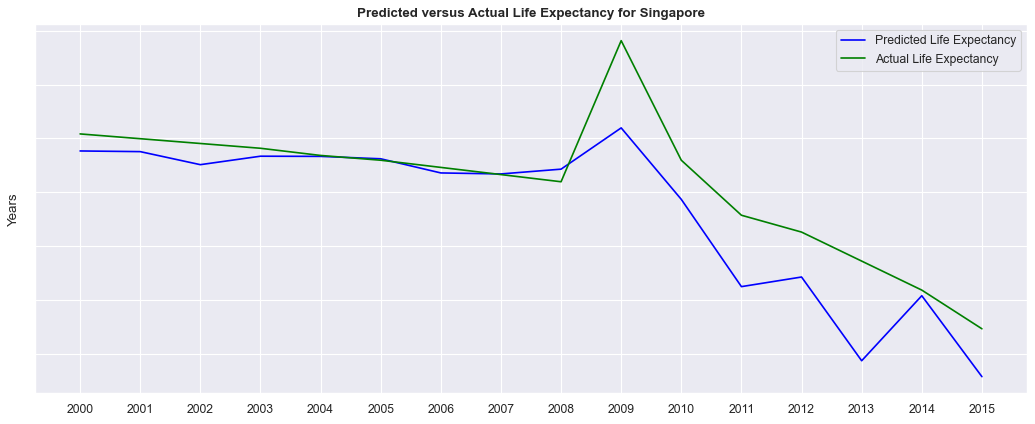

In [208]:
y_pred=life_transform[life_transform['COUNTRY']=='Singapore']['LIFE_EXPECTANCY'] #response variable
y_pred=pd.DataFrame(y_pred)
x_pred=life_transform[life_transform.columns[life_transform.columns!='LIFE_EXPECTANCY']] #predicting variables 
x_pred=x_pred[x_pred["COUNTRY"]=='Singapore']
x_pred.drop(['COUNTRY'],axis=1,inplace=True)

country_preds = regressor.predict(x_pred)

# plot predicted against actual
year = [x for x in range(2000,2016)]
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(year, country_preds, label = "Predicted Life Expectancy", color='blue')
plt.plot(year, y_pred, label = "Actual Life Expectancy", color='green')
plt.xticks(year)
plt.ylabel("Years")
plt.title("Predicted versus Actual Life Expectancy for Singapore", fontweight="bold")
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

## Random Forest Regression with feature selection

In [209]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree

In [210]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


def select_features(X_train, y_train, X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=10)
    
    # learn relationship from training data ONLY
    fs.fit(X_train, y_train)
    
    #transform BOTH train and TEST
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f ' % (i, fs.scores_[i]))
   
#what are the features
X.columns[fs.get_support()]
Features=[]
for i in range(len(fs.get_support())):
    if fs.get_support()[i]== True:
        Features.append(X.columns[i])
print(Features)

Feature 0: 931.632690 
Feature 1: 62.121055 
Feature 2: 1596.325284 
Feature 3: 8.123077 
Feature 4: 387.431139 
Feature 5: 460.896530 
Feature 6: 221.037494 
Feature 7: 184.867789 
Feature 8: 977.376065 
Feature 9: 3.136827 
Feature 10: 916.584162 
Feature 11: 61.120337 
Feature 12: 939.608160 
Feature 13: 2854.530658 
Feature 14: 513.190948 
Feature 15: 1.277854 
Feature 16: 1316.357030 
Feature 17: 5301.080813 
Feature 18: 1746.096913 
['STATUS', 'ADULT_MORTALITY', 'BMI', 'POLIO', 'DIPHTHERIA', 'HIV/AIDS', 'GDP', 'THINNESS_5_to_19_YEARS', 'INCOME_COMPOSITION_OF_RESOURCES', 'SCHOOLING']


C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Random Forest Regression

In [211]:
regressor=RandomForestRegressor(n_estimators=1000,random_state=42)
regressor.fit(X_train_fs,y_train.values.ravel())

RandomForestRegressor(n_estimators=1000, random_state=42)

### Check Output

In [212]:
y_train_pred=regressor.predict(X_train_fs)
y_test_pred=regressor.predict(X_test_fs)
y_train_pred=pd.DataFrame(y_train_pred,columns=['yPredict'])
y_test_pred=pd.DataFrame(y_test_pred,columns=['yPredict'])

### Scatter Plot

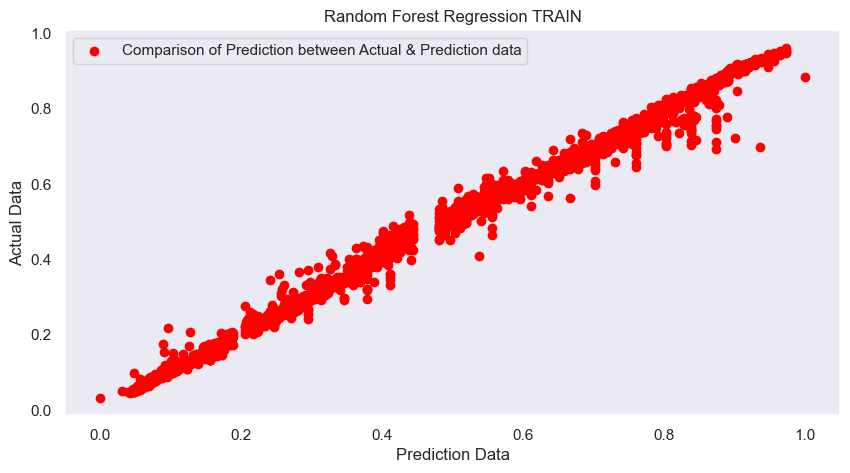

In [213]:
plt.figure(figsize=(10,5))
plt.scatter(y_train,y_train_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TRAIN')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

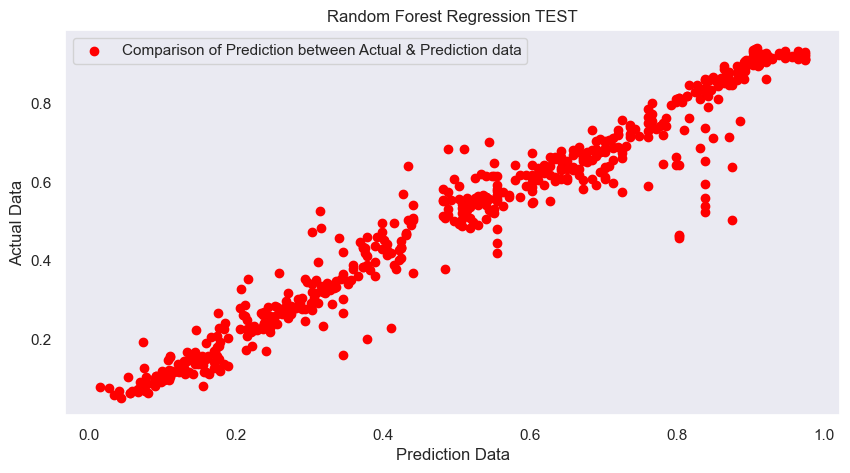

In [214]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TEST')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

In [197]:
plot_tree(regressor.estimators_[0],
              filled = True,
              feature_names=X_train.columns,
              fontsize=7)
plt.show()

KeyboardInterrupt: 

In [215]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train_fs, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test_fs, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

KfoldScore=cross_val_score(regressor, X_train_fs, y_train.values.ravel(), cv=5).mean()
print('K-fold Cross validation score:',KfoldScore)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9927308089244349
Mean Squared Error (MSE) 	: 0.0005583878832629066

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9523223602165546
Mean Squared Error (MSE) 	: 0.0038025433578071544

K-fold Cross validation score: 0.9364449112371689


### evaluating machine learning model predictions

To help us better evaluate the accuracy of our models and easily visualize the predictions done by model, we will create a function that plots the predicted values of `LIFE_EXPECTANCY` given by the model vs the actual `LIFE_EXPECTANCY`. We will do this for a sample country, Singapore.

C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


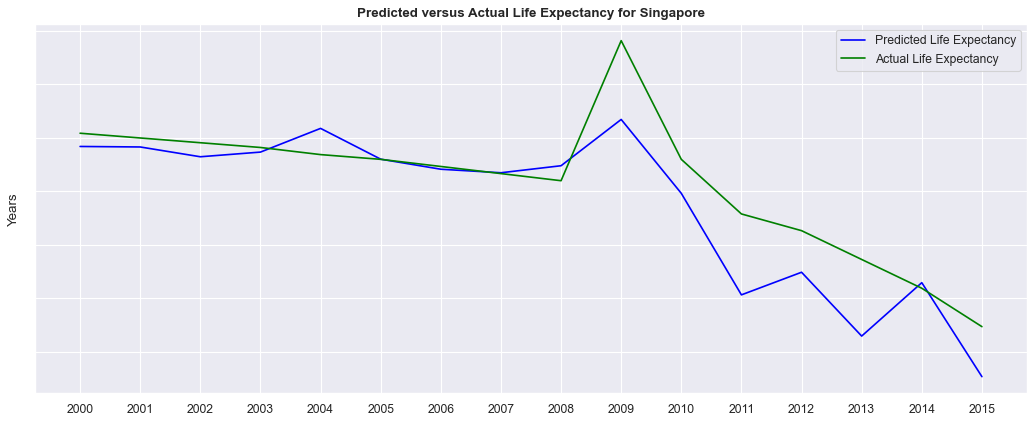

In [216]:
y_pred=life_transform[life_transform['COUNTRY']=='Singapore']['LIFE_EXPECTANCY'] #response variable
y_pred=pd.DataFrame(y_pred)
x_pred=life_transform[life_transform.columns[life_transform.columns!='LIFE_EXPECTANCY']] #predicting variables 
x_pred=x_pred[x_pred["COUNTRY"]=='Singapore']
drop=[]
for x in x_pred:
    if x not in Features:
        drop.append(x)
x_pred.drop(drop,axis=1,inplace=True)


country_preds = regressor.predict(x_pred)

# plot predicted against actual
year = [x for x in range(2000,2016)]
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(year, country_preds, label = "Predicted Life Expectancy", color='blue')
plt.plot(year, y_pred, label = "Actual Life Expectancy", color='green')
plt.xticks(year)
plt.ylabel("Years")
plt.title("Predicted versus Actual Life Expectancy for Singapore", fontweight="bold")
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

Even with only the 10 best features as select by SelectKBest, we do not see much of a drop in accuracy and performance of the model. There is really **no distinguishable difference** between Random Forest Regression with only the **top 10 features** and every single feature together. This shows that the rest of the features **do not play a role** in making our model better and thus should not be used in the model. We have thus reduced overfitting by **eliminating unnecessary** features using SelectKBest.

# Final verdict

We conclude that Random Forest Regressor is the most suitable model for our dataset since it has achieved a very high Explained Variance (R^2) for both **TRAIN** and **TEST** sets. Furthermore, the predicted values from **Random Forest Regressor are closest** to the **Actual Life Expectancy** in Singapore. Since it is able to make the most accurate predictions out of all our models, we will be using Random Forest Regressor with feature selection and improving on it in the next steps, by doing some hyperparameter optimization.